In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
reliance = yf.download('RELIANCE.NS',start='2020-1-01',end='2024-04-11')

[*********************100%%**********************]  1 of 1 completed


In [17]:
reliance.head()

,Open,High,Low,Close,Adj Close,Volume,next_close
Date,,,,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611,1360.645142,7002234,1403.775024
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024,1383.809326,8855158,1405.466553
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553,1385.476807,10492349,1372.870605
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605,1353.344604,12259588,1393.991699
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699,1374.165283,8341811,1383.522583


In [16]:
reliance['next_close'] = reliance['Close'].shift(-1)

In [ ]:
r

In [24]:
reliance.dropna(inplace=True)

In [25]:
x = reliance.iloc[:,:6]
#y = reliance['next_close']
y = reliance.iloc[:,6]

In [26]:
y.head()

Date
2020-01-01    1403.775024
2020-01-02    1405.466553
2020-01-03    1372.870605
2020-01-06    1393.991699
2020-01-07    1383.522583
Name: next_close, dtype: float64

In [27]:
x.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611,1360.645142,7002234
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024,1383.809326,8855158
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553,1385.476807,10492349
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605,1353.344604,12259588
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699,1374.165283,8341811


In [38]:
x.shape

(1059, 6)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=44)
x_train = x.iloc[:1000]
x_test = x.iloc[1000:]
y_train = y.iloc[:1000]
y_test = y.iloc[1000:]
lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

LinearRegression()

In [41]:

from sklearn.metrics import mean_squared_error
y_preds = lr_model.predict(x_test)
print(mean_squared_error(y_preds,y_test))

1904.0366716749659


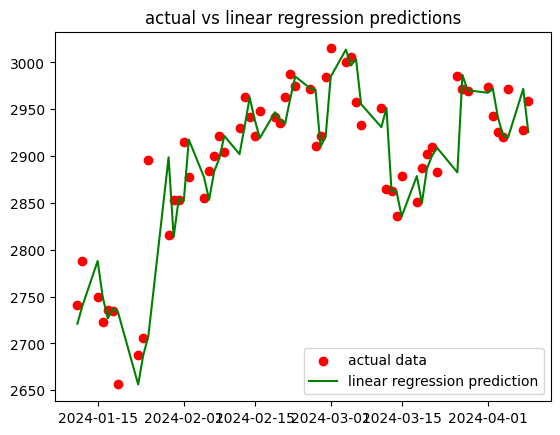

In [44]:
plt.title("actual vs linear regression predictions")
plt.scatter(y_test.index, y_test,label="actual data",color='red')
plt.plot(y_test.index, y_preds,label="linear regression prediction",color='green')
plt.legend()